<a href="https://colab.research.google.com/github/juancuevas-ops/Scrum-Centro-Medico-dos-alamos/blob/main/regresion_multilineal_juancuevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Se importan la librerias a utilizar
from sklearn import datasets, linear_model

In [20]:
#Importamos los datos de la misma librería de scikit-learn
forever_lineal = datasets.load_boston()

In [21]:
forever_lineal

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [22]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(forever_lineal.keys())

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [23]:
#Verifico las características del dataset
print('Características del dataset:')
print(forever_lineal.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

Como podemos leer en la descripción este dataset cuenta con 506 datos y 13 atributos, la columna 14 es el target y es la media del valor de las viviendas.

Seguidamente tenemos la descripción del significado de cada una de las columnas o atributos de los datos. De igual forma nos indica un dato importante para nuestro análisis y es que nos indican que no existe ningún valor perdido, en consecuencia, nuestra data esta completa por lo que no es necesario realizar mucho preprocesamiento a los datos.

Ahora utilizaremos la instrucción shape para determinar la cantidad de datos contamos, aunque este es un paso de más ya que esta información nos la había dado previamente la descripción del dataset, pero de todas formas lo hacemos.

In [24]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(forever_lineal.data.shape)

Cantidad de datos:
(506, 13)


Como ya nos lo habían indicado este conjunto de datos cuenta con 506 muestras y 13 columnas.

Finalmente veamos las etiquetas de cada columna para ello utilizamos feature_names.

In [25]:
#Verifico la información de las columnas
print('Nombres columnas:')
print(forever_lineal.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Sabiendo toda esta información entonces procedemos a preparar los datos que vamos a utilizar para crear el modelo.

Para este ejemplo vamos a implementar un predictor de Regresión Lineal Múltiple, por lo que podemos tomar varios atributos de nuestros datos para crear el modelo. Para nuestro análisis solamente vamos a tomar las columnas correspondientes al número de habitaciones con las que cuenta la casa, esta sería la que lleva por nombre “RM”, el tiempo que ha tenido ocupada, correspondiente a la columna “AGE” y la distancia que se encuentra la misma de los centros de trabajos de Boston que vendría siendo la columna con el nombre “DIS”. Estas columnas se encuentran ubicadas en la posición 5, 6 y 7 de los datos y estas vendrían siendo la variable “X”.

In [26]:
#Seleccionamos las columna 5, 6 y 7 del dataset
X_multiple = forever_lineal.data[:, 5:8]

Definido “X” ahora definimos “y” el cual será igual a los datos contenidos en target, como ya lo habíamos visto anteriormente.

In [27]:
#Defino los datos correspondientes a las etiquetas
y_multiple = forever_lineal.target

Como ya tenemos nuestros datos ahora procedemos a separarlos en entrenamiento y prueba lo hacemos utilizando la instrucción train_test_split, no si antes importando la respectiva librería.

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [28]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.

In [29]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

Fíjate que es el mismo algoritmo que utilizamos en el ejemplo de Regresión Lineal Simple, esto se debe a que todos los algoritmos relacionados a Regresión Lineal utilizan esta misma librería, es decir no tiene que configurarse nada adicional para implementarla.

Definido el algoritmo ahora procedemos a entrenar nuestro modelo con los datos correspondiente, para ello utilizamos la instrucción fit.

In [30]:
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y finalmente realizamos la predicción utilizando los datos de prueba.

In [31]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)


In [15]:
print(Y_pred_multiple)

[31.02059098 20.78861774 15.36265058 19.66525735 27.999917   19.84924273
 15.48821449 15.37818757 19.11178944 20.30402786 32.34663612 21.04095236
 38.65555818 31.72357692 24.01084832 21.72562544 31.66691093 26.78222037
 21.51087883 34.11035655 21.3360692  21.69325642 14.25177584 36.89037273
 23.85651485 26.39684311 38.1359433  18.11014856 14.59672685 31.88847266
 23.58718308 20.67447625 31.59635275 22.19271749 24.2592944  19.45553398
 28.60552632 28.40772788 21.76347491 37.21289281 38.39823023 22.01649258
 22.89792204 22.48200933 14.10693315 37.22902127 26.13458075 21.7622013
 20.25618082 25.96764382 17.26019026 23.45574795 32.18072822 11.43728333
 34.28184305 26.22004985 15.65497461 19.50048751 23.19084554 35.82963798
 15.42106288 21.28757022 18.95630526 25.89864989 21.6193571  30.3100095
 13.53191383 19.68971892 24.30180469 23.26821354 18.18380512 20.63626298
 21.65005716 27.12929297 30.15467617 28.970126   26.18087932 20.0035157
 37.20232773 17.56639143 21.98311534 16.37953731 15.62

In [32]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 8.12143375 -0.10909645 -0.56852593]
Valor de la intersección o coeficiente "b":
-18.866592850498115


Como podemos observar para “a”, nos devuelve tres valores, esto se debe a que estamos utilizando 3 características para nuestro análisis por lo que cada una de ellas tendrá un valor correspondiente de “a”. Los valores serían los siguientes: 8,215 para el primero, -0,096 para el segundo y -0,491 para el último. A su vez el valor de “b” o la intersección es de -20,354.

Teniendo todos estos datos ahora calculemos la precisión del algoritmo para ello empleamos la instrucción “score” el cual devuelve el resultado de la estadística R al cuadrado.

In [17]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.47609919319117655


El resultado obtenido acá es de 0,518, como ya lo habíamos visto comparando los resultados de “y_predict” podíamos deducir que la precisión no iba a ser muy buena. Recuerda que mientras este valor sea más cercano a 1 mejor será nuestro modelo.

Finalizando ya nuestro análisis podemos decir que el programa en si es muy parecido al de Regresión Lineal Simple, por no decir que igual, la única gran diferencia es que los datos de X contendrán más de una columna o característica de nuestro datase

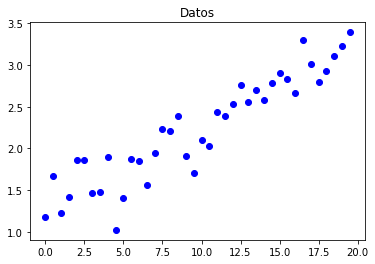

In [42]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
%matplotlib inline 
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(506) # para poder reproducirlo
    y = 0.1*x + 1.26 + 0.2*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');